# Einleitung: Lineare Regression

Bei der linearen Regression liegen Beispieldatenpunkte

    (x1,y1), (x2,y2), ..., (xn,yn)

vor. Gehen wir davon aus, dass es einen linearen Zusammenhang zwischen den x- und y-Werten gibt, müsste es Parameter `a` und `b` geben, so dass wir jeden y-Wert aus dem zugehörigen x-Wert berechnen können:

    y = a*x + b
    
In der Praxis liegen oft Werte vor, die einen *annähernd* linearen Zusammenhang haben. Zum Beispiel wird der Preis eines Autos in etwa mit seinem km-Stand fallen:

- niedriger km-Stand --> hoher Preis
- hoher km-Stand --> niedriger Preis

Das könnte beispielhaft in etwa (bei einem speziellen Automodell) bei einem Neupreis des Automodells von b=50.000 EUR so aussehen:

In [67]:
import numpy as np

nr_bsp = 10

autos_km_staende = np.random.randint( low=0, high=100000, size=(nr_bsp,) )

a = -0.3
b = 50000
rauschen = np.random.normal(loc=0, scale=1000.0, size=nr_bsp)
autos_preise = a * autos_km_staende + b + rauschen

In [68]:
autos_km_staende

array([  941, 72367, 14027, 28423,   905, 60292, 25584,  6339, 68991,
       62167])

In [72]:
rauschen

array([  387.41964215,  1456.39432422,  1550.72809951,   254.15355699,
        -791.20886773,   276.45846263,   198.29682562, -1693.88672468,
         271.93934078,  -609.02389714])

In [73]:
autos_preise

array([50105.11964215, 29746.29432422, 47342.62809951, 41727.25355699,
       48937.29113227, 32188.85846263, 42523.09682562, 46404.41327532,
       29574.63934078, 30740.87610286])

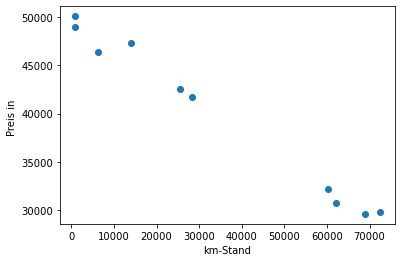

In [74]:
from matplotlib import pyplot as plt

plt.scatter(autos_km_staende, autos_preise)
plt.xlabel("km-Stand")
plt.ylabel("Preis in ")
plt.show()

Wir haben hier absichtlich etwas *Rauschen* auf jeden Preis addiert, d.h.

    Preis = Neupreis + -0.5 * km-Stand
          = 50000 - 0.5 * km-Stand
          
um den linearen Zusammenhang "aufzuweichen". Schließlich gibt es bei jedem individuellem Verkaufsgeschäft auch viel Verhandlungsspielraum.

Die Frage ist nun: können wir, wenn wir nur die beobachteten Datenpunkte haben, den linearen Zusammenhang berechnen? Mit anderen Worten: können wir `a` und `b`, die beiden Parameter, die den linearen Zusammenhang wiedergeben, aus den Datenpunkten berechnen?

# Linearen Zusammenhang berechnen

scikit-learn bietet auch hierzu natürlich eine Funktionalität bzw. Klasse namens `LinearRegression`:

In [85]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

reg = linear_model.fit(autos_km_staende.reshape(-1,1), autos_preise)

Der Rückgabewert der `fit()` Methode enthält gerade die beiden Parameter `a` und `b`.

Den von sciki-learn bestimmten multiplikativen Parameter `a` erhalten sie so:

In [88]:
reg.coef_

array([-0.28930278])

Den von sciki-learn bestimmten y-Achsenabschnitt (Parameter `b`) erhalten sie so:

In [89]:
reg.intercept_

49766.383097311336

Man sieht, dass die Werte ziemlich genau den tatsächlichen Werten `a=0.3` und `b=50000` entsprechen. Nicht perfekt, denn wir haben ja auch noch ein Rauschen auf die Generierung unserer Beispieldatenpunkte addiert.